In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data processing
Dataset obtained from this blogpost.
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

In [21]:
df = pd.read_csv('iris-data.csv')

In [22]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,100.000000,100.000000,100.000000,95.000000
mean,5.193940,3.095000,2.862000,0.816842
std,1.334795,0.475326,1.448565,0.563170
min,0.055000,2.000000,1.000000,0.100000
25%,4.975000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,1.000000
75%,5.800000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  100 non-null    float64
 1   sepal_width_cm   100 non-null    float64
 2   petal_length_cm  100 non-null    float64
 3   petal_width_cm   95 non-null     float64
 4   class            100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [25]:
#Removing all null values row
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  95 non-null     float64
 1   sepal_width_cm   95 non-null     float64
 2   petal_length_cm  95 non-null     float64
 3   petal_width_cm   95 non-null     float64
 4   class            95 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.5+ KB


In [26]:
df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [27]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Now dividing the dataset
- First in input data (X) and output data (y) 
- Then dividing training and test data (No validation, but why?) 
- Also added an extra column with all 1's. (Why)

In [28]:
inp_df = df.drop(df.columns[[4]], axis=1)
out_df = df.drop(df.columns[[0,1,2,3]], axis=1)

#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

# Adding an extra column to be compatible with bias
new_c = (np.zeros(shape=(inp_df.shape[0],1)) + 1)
inp_df = np.concatenate((inp_df, new_c), axis=1)

#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [29]:
X_train[:5]

array([[ 0.65540611, -0.59375803,  0.73869892,  0.86247727,  1.        ],
       [ 0.14025935,  0.65973115, -0.85464475, -1.10111477,  1.        ],
       [ 0.58181371, -0.59375803,  1.50073285,  1.39800238,  1.        ],
       [ 0.14025935, -0.17592831,  1.08507798,  1.21949401,  1.        ],
       [-0.15411022,  0.24190142, -1.20102381, -1.10111477,  1.        ]])

In [30]:
y_train[:5]

,class
71,0
20,1
83,0
84,0
35,1


# Logistic Regression
## Model Equation

$$y = \frac{1}{1+e^{-\sum{w_i x_i}}}$$


## Binary cross entropy loss

$$loss = - \frac{1}{N} \sum_{i=1}^N y \log{\hat{y}} + (1-y) \log{(1-\hat{y})}$$

# Derivative of sigmoid loss funtion for logistic regression
https://medium.com/@andrewdaviesul/chain-rule-differentiation-log-loss-function-d79f223eae5
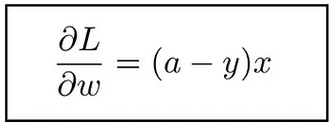

In [31]:
def model(X, W): # W is an array of weights
    # Logistic regression model implementation
#     y = np.zeros(shape=(X.shape[0], 1))
#     y = np.expand_dims(y, axis=1)
    y = 1/(1+np.e**-(np.sum(W*X)))
#     p = np.sum(X*W)
#     tmp = np.e**(-p)
#     tmp = tmp+1
#     y = 1/tmp
#     y = np.expand_dims(y,axis=1)
    return y

# model(X_train,X_train)

In [32]:
def loss_bce(y_true, y_pred, W):
    # Binary cross entropy loss
    loss = -(1/y_true.shape[0])*(np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred)))
    return loss

In [33]:
def fit(num_weights, epoch=100, lr = 1):
    # Initialization
    W = np.zeros(num_weights)
    
    # Epochs start
    for e in range(1, epoch+1):           
        y_pred = model(X_train, W)
        print(e, ". Loss: ", loss_bce(y_train, y_pred, W), ", W: ", W)
        
        for i in range(W.shape[0]):
            # Calculate derivative against parameters [Implement yourself]
            x_i = X_train[:,i]
            x_i = np.expand_dims(x_i,axis=1)
            dw_i = np.mean((y_pred-y_train)*x_i)
            
            # Update parameters [Implement yourself]
            W[i] = W[i]-lr*dw_i
        
        # Plot the lines
        # Y_hat = w * X + b
        # plt.plot(X, Y_hat, label="Epoch: "+str(i))
    
    # plt.scatter(X, Y, label="dataset")
    # plt.legend()
    # plt.show()
    
    return W

In [37]:
W = fit(5,lr = 0.001)

1 . Loss:  class    0.693147
dtype: float64 , W:  [0. 0. 0. 0. 0.]
2 . Loss:  class    0.692701
dtype: float64 , W:  [-8.75929383e-05  3.25380560e-04 -4.75498811e-04 -4.77571695e-04
 -5.26315789e-05]
3 . Loss:  class    0.692281
dtype: float64 , W:  [-0.00017508  0.00065056 -0.00095093 -0.00095509 -0.0001031 ]
4 . Loss:  class    0.691887
dtype: float64 , W:  [-0.00026246  0.00097554 -0.00142631 -0.00143255 -0.00015144]
5 . Loss:  class    0.691518
dtype: float64 , W:  [-0.00034974  0.00130032 -0.00190162 -0.00190995 -0.0001977 ]
6 . Loss:  class    0.691171
dtype: float64 , W:  [-0.00043693  0.00162492 -0.00237687 -0.0023873  -0.00024192]
7 . Loss:  class    0.690847
dtype: float64 , W:  [-0.00052401  0.00194933 -0.00285206 -0.0028646  -0.00028414]
8 . Loss:  class    0.690545
dtype: float64 , W:  [-0.000611    0.00227355 -0.00332719 -0.00334184 -0.0003244 ]
9 . Loss:  class    0.690262
dtype: float64 , W:  [-0.00069789  0.00259759 -0.00380227 -0.00381904 -0.00036273]
10 . Loss:  clas

c:\Users\Acer\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


17 . Loss:  class    0.688625
dtype: float64 , W:  [-0.00138986  0.00518387 -0.00760096 -0.00763489 -0.0006044 ]
18 . Loss:  class    0.688486
dtype: float64 , W:  [-0.00147598  0.00550645 -0.00807557 -0.00811168 -0.00062701]
19 . Loss:  class    0.68836
dtype: float64 , W:  [-0.00156203  0.00582887 -0.00855014 -0.00858842 -0.00064803]
20 . Loss:  class    0.688246
dtype: float64 , W:  [-0.001648    0.00615116 -0.00902466 -0.00906512 -0.00066751]
21 . Loss:  class    0.688143
dtype: float64 , W:  [-0.0017339   0.00647329 -0.00949913 -0.00954177 -0.00068546]
22 . Loss:  class    0.68805
dtype: float64 , W:  [-0.00181972  0.0067953  -0.00997356 -0.0100184  -0.00070193]
23 . Loss:  class    0.687968
dtype: float64 , W:  [-0.00190547  0.00711716 -0.01044795 -0.01049498 -0.00071693]
24 . Loss:  class    0.687895
dtype: float64 , W:  [-0.00199116  0.00743889 -0.0109223  -0.01097152 -0.0007305 ]
25 . Loss:  class    0.687832
dtype: float64 , W:  [-0.00207677  0.00776049 -0.0113966  -0.0114480